In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
display=None
pd.set_option('display.max_rows',display)
pd.set_option('display.max_columns',display)

In [3]:
data=pd.read_csv('data/BTC-USD.csv')
data=data[837:]
data=data.reset_index(drop=True)

In [4]:
def FuncionSMA(values, period): #FUNCIONA
    values=pd.Series(values)
    result=pd.DataFrame()
    result['SMA'] = values.rolling(window=period).mean()
    
#     plt.figure(figsize=(20,10))
    
#     plt.plot(values, label='Valores de entrada', alpha=0.2)
#     plt.plot(result['SMA'], label='SMA')

#     plt.legend(loc='upper left')
#     plt.show()
    
    return result['SMA']

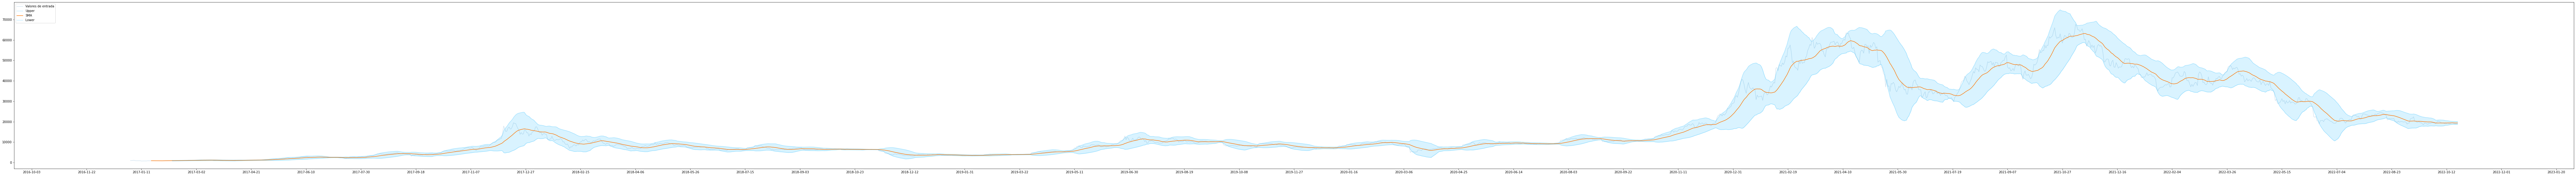

In [5]:
#Bollinger Bands
#FuncionSMA

bbol_df = pd.DataFrame()
bbol_df['Date']=data['Date']    

days=20

def Calc_Bands(dt, bbol, d,k):
    result=pd.DataFrame()
    result['Date']=dt['Date']
    result['Close']=dt['Close']
    result['SMA']=FuncionSMA(data['Close'],d)
    result['Close_sma']=dt['Close']-result['SMA']    
    result['sqr']=result['Close_sma'].pow(2)
    result['sqr_sum']=result['sqr'].rolling(window=d).sum()
    result['sqr_mean']=result['sqr_sum']/(d)
    result['StdDev']=np.sqrt(result['sqr_mean'])
    
#     result['StdDev']=data['Close'].rolling(window=d).std()
 
    k_std=k * result['StdDev']
    
    bbol['StdDev']=result['StdDev']
    bbol['Upper_band']=result['SMA'] + k_std
    bbol['Middle_band']=result['SMA']
    bbol['Lower_band']=result['SMA'] - k_std
    
    
    plt.figure(figsize=(150,10))

    intervalo=50
    dates = dt['Date']
    x_values = [time.strptime(d, "%Y-%m-%d").date() for d in dates]

    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator(interval=intervalo)
    ax.xaxis.set_major_locator(locator)

    plt.plot(x_values,data['Close'], label='Valores de entrada', alpha=0.2)
    plt.plot(x_values,bbol_df['Upper_band'], label='Upper', color='#00b2ff42')
    plt.plot(x_values,bbol_df['Middle_band'], label='SMA', color='#FF7400')
    plt.plot(x_values,bbol_df['Lower_band'], label='Lower', color='#00b2ff42')
    
    plt.fill_between(x_values,bbol_df['Lower_band'],bbol_df['Upper_band'],color='#00b2ff42', alpha=0.15)
    
    plt.legend(loc='upper left')
    plt.show()


    return result
    
result= Calc_Bands(data, bbol_df, days, 2)

In [6]:
bbol_df

,Date,StdDev,Upper_band,Middle_band,Lower_band
0,2017-01-01,NaN,NaN,NaN,NaN
1,2017-01-02,NaN,NaN,NaN,NaN
2,2017-01-03,NaN,NaN,NaN,NaN
3,2017-01-04,NaN,NaN,NaN,NaN
4,2017-01-05,NaN,NaN,NaN,NaN
5,2017-01-06,NaN,NaN,NaN,NaN
6,2017-01-07,NaN,NaN,NaN,NaN
7,2017-01-08,NaN,NaN,NaN,NaN
8,2017-01-09,NaN,NaN,NaN,NaN
9,2017-01-10,NaN,NaN,NaN,NaN


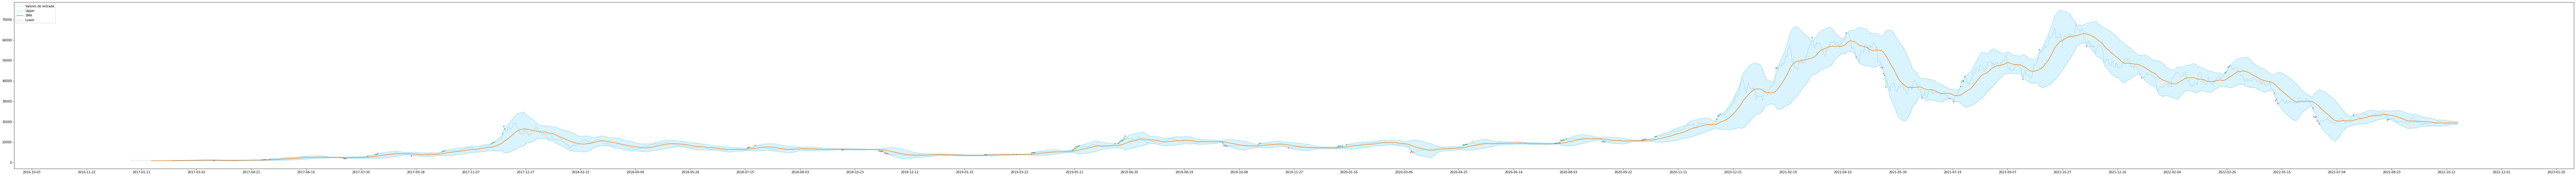

Precios:
                 Totales           Top        Bottom
Date                                                
2017-03-18    973.817993           NaN    973.817993
2017-05-01   1421.599976   1421.599976           NaN
2017-05-02   1452.819946   1452.819946           NaN
2017-05-03   1490.089966   1490.089966           NaN
2017-05-04   1537.670044   1537.670044           NaN
2017-05-08   1723.349976   1723.349976           NaN
2017-07-14   2233.340088           NaN   2233.340088
2017-07-15   1998.859985           NaN   1998.859985
2017-07-16   1929.819946           NaN   1929.819946
2017-08-05   3252.909912   3252.909912           NaN
2017-08-12   3884.709961   3884.709961           NaN
2017-08-13   4073.260010   4073.260010           NaN
2017-08-14   4325.129883   4325.129883           NaN
2017-09-14   3154.949951           NaN   3154.949951
2017-10-12   5446.910156   5446.910156           NaN
2017-10-13   5647.209961   5647.209961           NaN
2017-10-14   5831.790039   5831.79003

In [91]:
precio=data['Close']
fecha=data['Date']

def Calc_Precios_Fuera():
    #Datos y arrays necesarios
    top=bbol_df['Upper_band']
    pasada_top=[]

    bottom=bbol_df['Lower_band']
    pasada_bottom=[]

    middle=bbol_df['Middle_band']

    pasada_total=[]


    #Calculo
    for i in range(len(precio)):
        if (precio[i]>top[i]):
            pasada_total.append(precio[i])

        elif(precio[i]<bottom[i]):

            pasada_total.append(precio[i])

        else:
            pasada_total.append(np.nan)
        
    return pasada_total

def Data_Precios_Fuera():
    pasada_total=Calc_Precios_Fuera()
    
    #Creacion DataFrame
    
    pasadas_df=pd.DataFrame()
    pasadas_df['Date']=fecha

    #Almacenar Resultado
    
    pasadas_df['Totales']=pd.Series(pasada_total)

    mask1 = pasada_total>middle #Devuelve una serie de true/false
    mask2 = pasada_total<middle

    pasadas_df['Top']=pd.Series(pasadas_df['Totales'][mask1])
    pasadas_df['Bottom']=pd.Series(pasadas_df['Totales'][mask2])

    pasadas_df=pasadas_df.set_index('Date')
    pasadas_df=pasadas_df.dropna(how='all')
    
    return pasadas_df

def Graficar_BBOL_Precios_Fuera():
    
    pasadas_df=Data_Precios_Fuera()
    
    #LETS PLOT!
    plt.figure(figsize=(150,10))

    intervalo=50
    dates = data['Date']
    x_values = [time.strptime(d, "%Y-%m-%d").date() for d in dates]

    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator(interval=intervalo)
    ax.xaxis.set_major_locator(locator)

    plt.plot(x_values,data['Close'], label='Valores de entrada', alpha=0.2)
    plt.plot(x_values,bbol_df['Upper_band'], label='Upper', color='#00b2ff42')
    plt.plot(x_values,bbol_df['Middle_band'], label='SMA', color='#FF7400')
    plt.plot(x_values,bbol_df['Lower_band'], label='Lower', color='#00b2ff42')

    plt.scatter(pasadas_df.index,pasadas_df['Top'],marker='.',color='g',alpha=0.5) #No se puede usar x_values porque es un array entonces no puede comparar el dataframe de trues y falses que devuelve la mask, sin embargo el data['Dates'] si puede compararlos y decir que si el valor correspondiente a esa fecha, segun la mask, es false, no se pone
    plt.scatter(pasadas_df.index,pasadas_df['Bottom'],marker='.',color='r',alpha=0.5)

    plt.fill_between(x_values,bbol_df['Lower_band'],bbol_df['Upper_band'],color='#00b2ff42', alpha=0.15)

    plt.legend(loc='upper left')
    plt.show()
    
def Calcular_Porcentaje(dato1, dato2):
    num1=len(dato1)
    num2=len(dato2)
    
    resultado = pd.Series(num1/num2*100)
    return resultado
    
def Imprimir_Data_Porcentajes_BBOL():
    
    pasadas_df=Data_Precios_Fuera()
    
    porcentajes_df=pd.DataFrame()

    porcentajes_df['% Total Fuera'] = Calcular_Porcentaje(pasadas_df['Totales'], precio)
    porcentajes_df['% Top Fuera'] = Calcular_Porcentaje(pasadas_df['Top'].dropna(), precio)
    porcentajes_df['% Bottom Fuera'] = Calcular_Porcentaje(pasadas_df['Bottom'].dropna(), precio)

    return porcentajes_df


Graficar_BBOL_Precios_Fuera()
print('Precios:')
print(Data_Precios_Fuera()) #Formato DataFrame solo se puede imprimir uno
print('Porcentajes:')
print(Imprimir_Data_Porcentajes_BBOL()) #Formato DataFrame solo se puede imprimir uno


,% Total Fuera,% Top Fuera,% Bottom Fuera
0,6.694955,4.290429,2.404526
